In [57]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [58]:
df = pd.read_csv('train.csv')
df.shape

(2190, 13)

In [59]:
df.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [60]:
df['pressure'].describe()

count    2190.000000
mean     1013.602146
std         5.655366
min       999.000000
25%      1008.600000
50%      1013.000000
75%      1017.775000
max      1034.600000
Name: pressure, dtype: float64

In [61]:
df[df['pressure']>1030]

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
17,17,18,1034.6,17.5,16.2,14.1,11.8,68.0,60.0,2.5,50.0,13.4,0
383,383,19,1034.6,11.2,10.4,7.0,3.4,77.0,95.0,0.0,40.0,16.0,1
1828,1828,4,1032.3,17.3,17.3,16.7,16.6,73.0,83.0,0.0,30.0,19.3,1
1840,1840,16,1034.6,10.4,8.7,7.0,2.4,46.0,19.0,10.0,20.0,34.3,0


In [62]:
df['pressure'].unique

<bound method Series.unique of 0       1017.4
1       1019.5
2       1024.1
3       1013.4
4       1021.8
         ...  
2185    1014.6
2186    1012.4
2187    1013.3
2188    1022.3
2189    1013.8
Name: pressure, Length: 2190, dtype: float64>

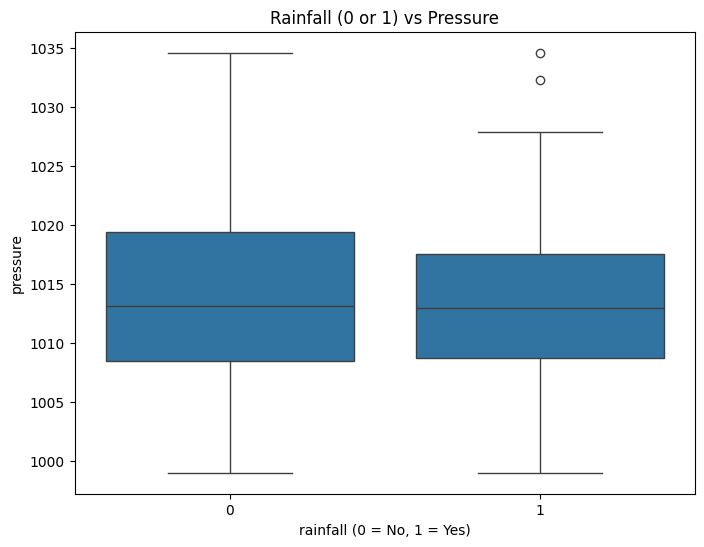

In [63]:
plt.figure(figsize=(8, 6))
sn.boxplot(x='rainfall', y='pressure', data=df)
plt.title('Rainfall (0 or 1) vs Pressure')
plt.xlabel('rainfall (0 = No, 1 = Yes)')
plt.ylabel('pressure')
plt.show()

In [64]:
rd = df[df['rainfall']==1]
rd[rd['pressure']>1020]

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
5,5,6,1022.7,20.6,18.6,16.5,12.5,79.0,81.0,0.0,20.0,15.7,1
12,12,13,1020.4,15.0,15.5,13.2,12.0,77.0,86.0,0.0,50.0,32.4,1
15,15,16,1024.3,15.3,12.9,10.0,11.2,79.0,91.0,0.3,20.0,20.0,1
16,16,17,1022.5,16.3,13.1,11.4,2.0,79.0,70.0,6.8,20.0,30.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2170,2170,346,1024.1,19.3,18.3,17.3,18.8,77.0,84.0,8.3,80.0,31.8,1
2173,2173,349,1022.2,17.5,16.5,15.9,13.3,77.0,88.0,0.0,50.0,24.2,1
2179,2179,355,1021.2,20.9,18.9,17.2,16.6,79.0,88.0,0.1,50.0,26.7,1
2182,2182,358,1022.6,18.5,16.8,15.8,12.1,80.0,88.0,1.3,30.0,24.4,1


In [65]:
rd[rd['pressure']>1030]

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
383,383,19,1034.6,11.2,10.4,7.0,3.4,77.0,95.0,0.0,40.0,16.0,1
1828,1828,4,1032.3,17.3,17.3,16.7,16.6,73.0,83.0,0.0,30.0,19.3,1


In [66]:
Q1 = df['pressure'].quantile(0.25)
Q3 = df['pressure'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df2 = df[(df['pressure'] >= lower_bound) & (df['pressure'] <= upper_bound)]
df2

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2185,361,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1,1
2186,2186,362,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3,1
2187,2187,363,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9,1
2188,2188,364,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,18.0,1


In [67]:
df2['pressure'].describe()

count    2186.000000
mean     1013.564776
std         5.592400
min       999.000000
25%      1008.600000
50%      1013.000000
75%      1017.700000
max      1027.900000
Name: pressure, dtype: float64

In [68]:
df2[df2['pressure']>1027]

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
387,387,23,1027.4,21.6,18.8,16.3,17.3,65.0,46.0,7.1,60.0,12.8,0
740,740,11,1027.1,18.5,15.4,13.7,10.1,75.0,89.0,0.0,60.0,39.5,1
1109,1109,15,1027.2,20.6,17.7,14.2,11.8,75.0,51.0,7.4,50.0,15.2,0
1116,1116,22,1027.9,21.6,18.5,16.3,13.7,77.0,93.0,0.6,20.0,15.1,0
1464,1464,5,1027.1,10.8,7.4,8.1,2.5,61.0,95.0,0.1,20.0,24.0,1
1466,1466,7,1027.4,10.4,10.4,8.1,2.2,77.0,92.0,0.0,60.0,39.5,1
1478,1478,19,1027.8,19.7,16.7,14.7,11.1,67.0,44.0,9.9,20.0,20.5,0
1829,1829,5,1027.9,17.3,14.8,11.7,9.6,77.0,89.0,0.0,20.0,42.0,1
1834,1834,10,1027.6,17.2,15.5,12.7,9.9,76.0,89.0,0.5,20.0,48.0,1
1836,1836,12,1027.5,14.3,13.4,11.6,3.4,72.0,95.0,0.0,20.0,22.0,1


In [69]:
df2['mintemp'].describe()

count    2186.000000
mean       22.190165
std         5.038552
min         4.000000
25%        17.800000
50%        23.900000
75%        26.475000
max        29.800000
Name: mintemp, dtype: float64

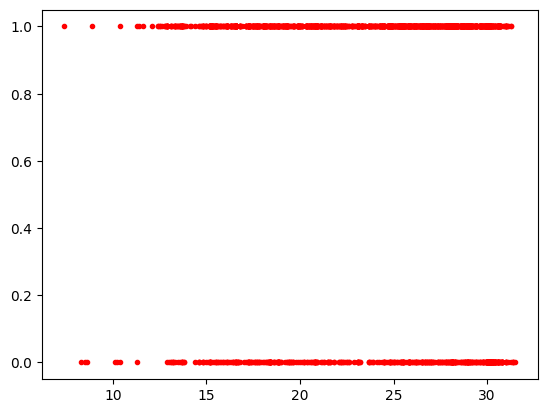

In [36]:
plt.scatter(df2.temparature, df2.rainfall, marker='.',color='red')

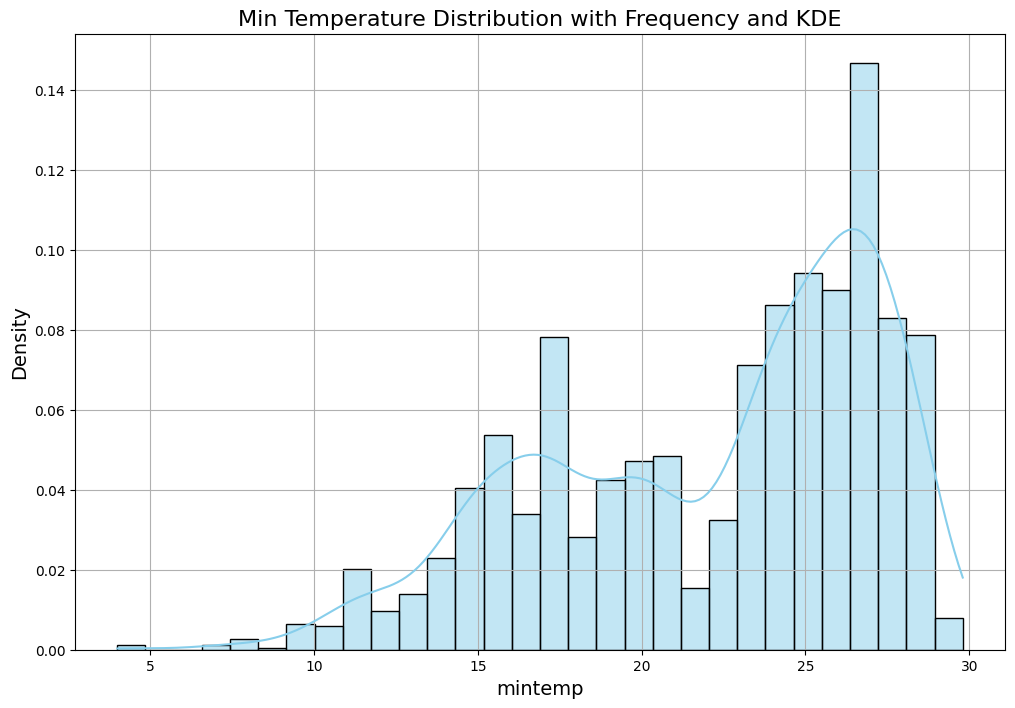

In [70]:
plt.figure(figsize=(12, 8))

sn.histplot(df2['mintemp'], kde=True, color='skyblue', bins=30, stat='density')

plt.title('Min Temperature Distribution with Frequency and KDE', fontsize=16)
plt.xlabel('mintemp', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True)

plt.show()

In [75]:
df3 = df2[df2['mintemp']>=9]

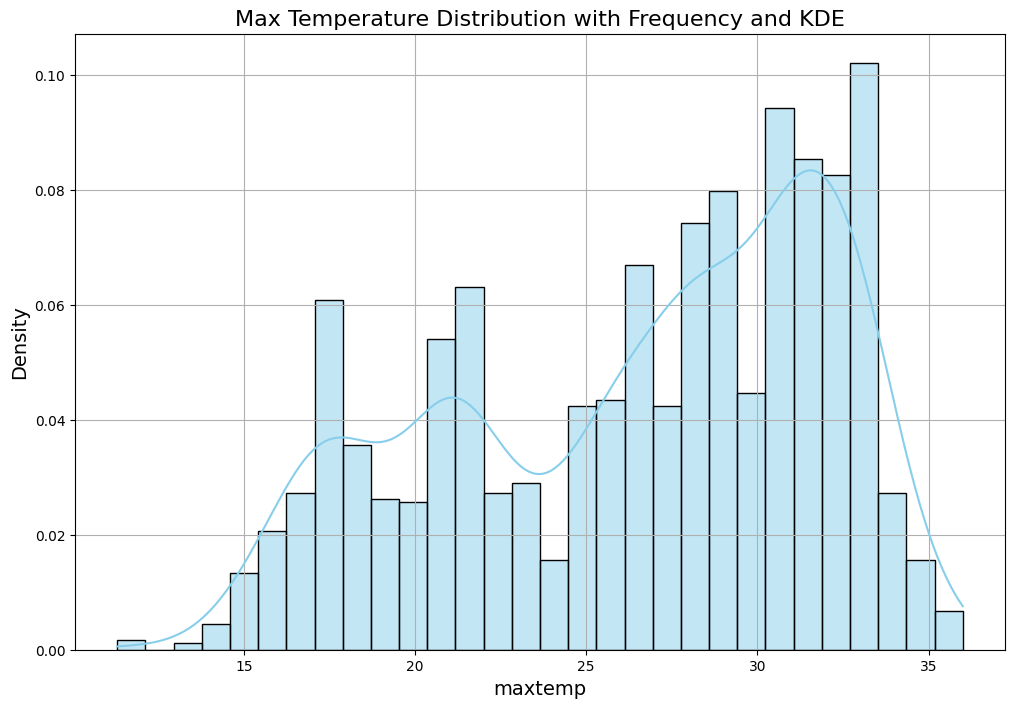

In [76]:
plt.figure(figsize=(12, 8))

sn.histplot(df3['maxtemp'], kde=True, color='skyblue', bins=30, stat='density')

plt.title('Max Temperature Distribution with Frequency and KDE', fontsize=16)
plt.xlabel('maxtemp', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True)

plt.show()

In [79]:
df3[df3['maxtemp']<12]

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
734,734,5,1024.4,11.3,11.4,10.4,8.6,77.0,88.0,0.0,20.0,39.3,1
1833,1833,9,1022.9,11.6,11.3,10.9,8.4,59.0,86.0,0.0,30.0,28.6,1


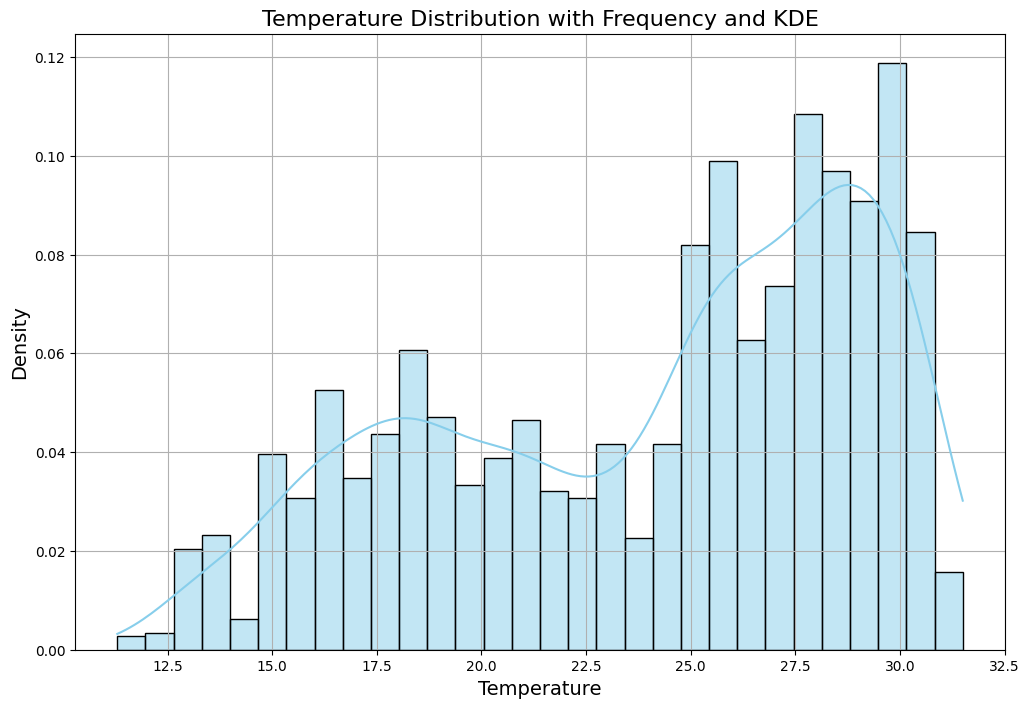

In [80]:
plt.figure(figsize=(12, 8))

sn.histplot(df3['temparature'], kde=True, color='skyblue', bins=30, stat='density')

plt.title('Temperature Distribution with Frequency and KDE', fontsize=16)
plt.xlabel('Temperature', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True)

plt.show()

In [82]:
from scipy import stats

# Calculate the Z-scores for the 'temparature' column in df2
z_scores = stats.zscore(df3['temparature'])

# Find the rows with Z-scores greater than 3 or less than -3 (outliers)
outliers_zscore = df3['temparature'][abs(z_scores) > 3]
print("Outliers based on Z-score method in 'temparature':", outliers_zscore)

Outliers based on Z-score method in 'temparature': Series([], Name: temparature, dtype: float64)


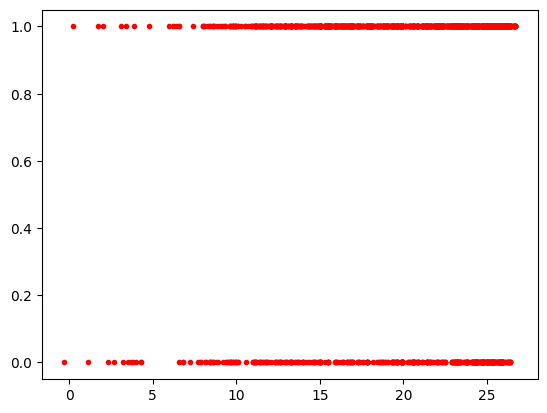

In [83]:
plt.scatter(df3.dewpoint, df3.rainfall, marker='.',color='red')

In [84]:
df3['dewpoint'].describe()

count    2176.000000
mean       20.552068
std         5.151453
min        -0.300000
25%        16.800000
50%        22.200000
75%        25.000000
max        26.700000
Name: dewpoint, dtype: float64

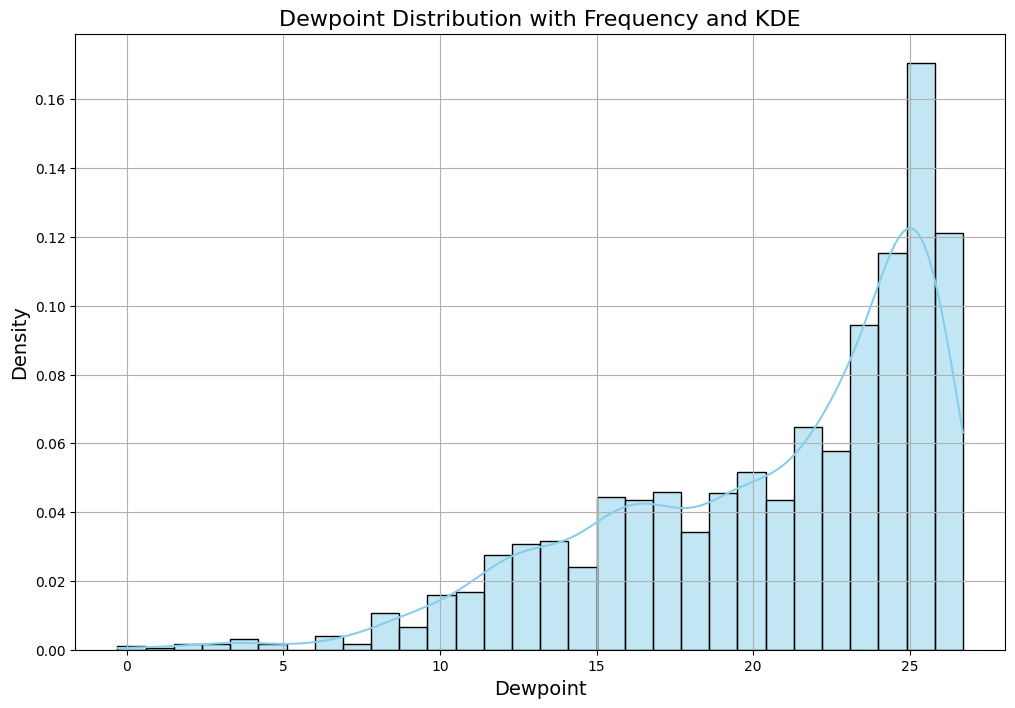

In [85]:
plt.figure(figsize=(12, 8))

sn.histplot(df3['dewpoint'], kde=True, color='skyblue', bins=30, stat='density')

plt.title('Dewpoint Distribution with Frequency and KDE', fontsize=16)
plt.xlabel('Dewpoint', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True)

plt.show()

In [102]:
df4 = df3[df3['dewpoint']>6]
df4

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2185,361,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1,1
2186,2186,362,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3,1
2187,2187,363,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9,1
2188,2188,364,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,18.0,1


In [104]:
df4[df4['dewpoint']>25].tail(30)

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
2015,2015,191,1006.2,33.8,30.3,28.3,26.4,81.0,87.0,5.7,230.0,21.8,0
2016,2016,192,1010.0,33.3,30.4,27.6,25.9,82.0,83.0,2.6,50.0,10.2,1
2017,2017,193,1008.3,33.0,30.6,29.0,26.0,79.0,72.0,8.3,220.0,13.9,1
2018,2018,194,1006.6,33.7,29.1,27.5,25.3,79.0,78.0,5.3,20.0,23.7,1
2019,2019,195,1009.7,32.8,30.2,28.9,25.4,78.0,43.0,8.1,240.0,10.2,0
2023,2023,199,1008.4,32.9,30.2,28.6,25.3,79.0,57.0,10.6,230.0,19.6,1
2024,2024,200,999.0,35.1,31.0,26.8,26.1,77.0,57.0,9.1,20.0,20.9,0
2026,2026,202,1010.7,31.9,28.9,26.7,25.7,84.0,81.0,3.2,60.0,6.6,1
2028,2028,204,1008.1,31.2,28.6,25.3,25.4,76.0,46.0,11.7,220.0,12.6,0
2029,2029,205,1009.9,31.9,28.8,27.4,26.1,84.0,88.0,2.7,80.0,17.2,1


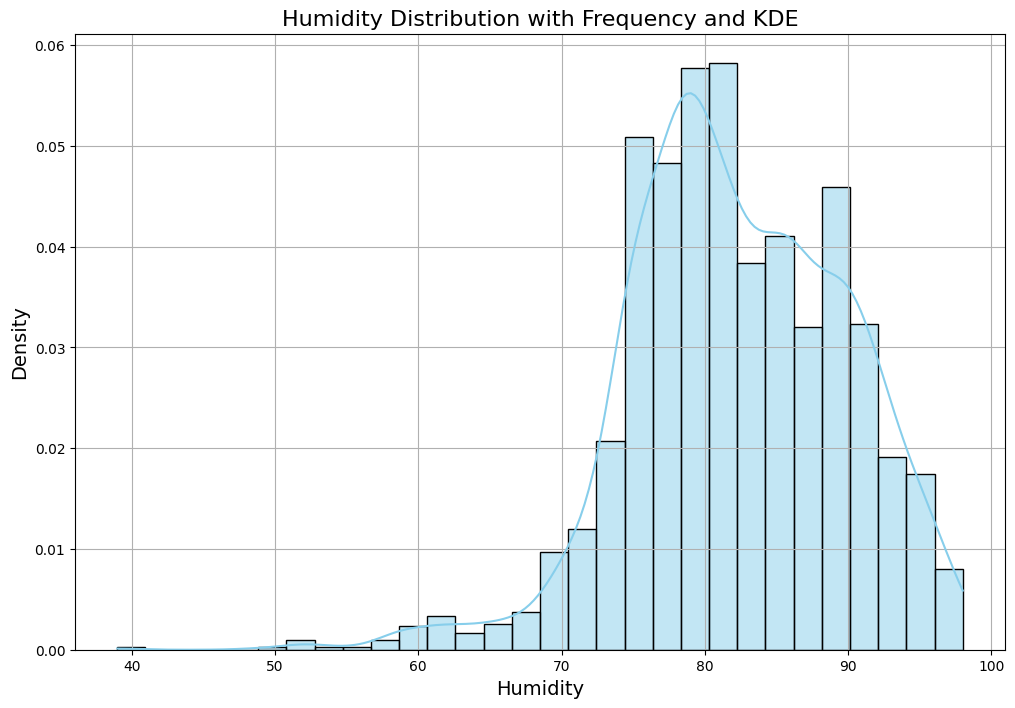

In [113]:
plt.figure(figsize=(12, 8))

sn.histplot(df4['humidity'], kde=True, color='skyblue', bins=30, stat='density')

plt.title('Humidity Distribution with Frequency and KDE', fontsize=16)
plt.xlabel('Humidity', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True)

plt.show()

In [109]:
df5 = df4[df4['humidity']>50]

In [110]:
df5['humidity'].describe()

count    2155.000000
mean       82.257541
std         7.501720
min        52.000000
25%        77.000000
50%        82.000000
75%        88.000000
max        98.000000
Name: humidity, dtype: float64

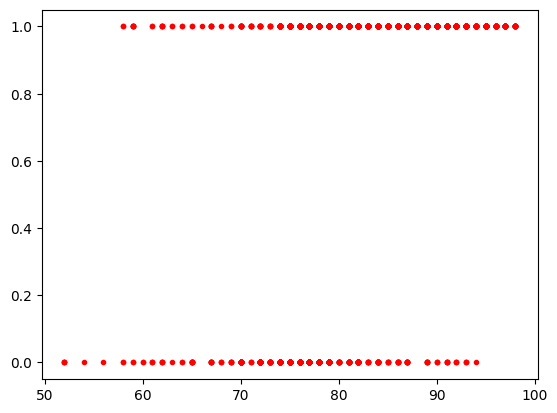

In [112]:
plt.scatter(df5.humidity, df5.rainfall, marker='.',color='red')

In [114]:
df5.isnull().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

In [119]:
df5['humidity'].unique()

array([87., 95., 75., 52., 79., 56., 96., 86., 77., 97., 98., 76., 92.,
       90., 84., 80., 74., 82., 91., 78., 88., 83., 72., 93., 69., 63.,
       59., 89., 85., 81., 73., 70., 67., 65., 94., 61., 71., 58., 62.,
       68., 54., 64., 66., 60.])

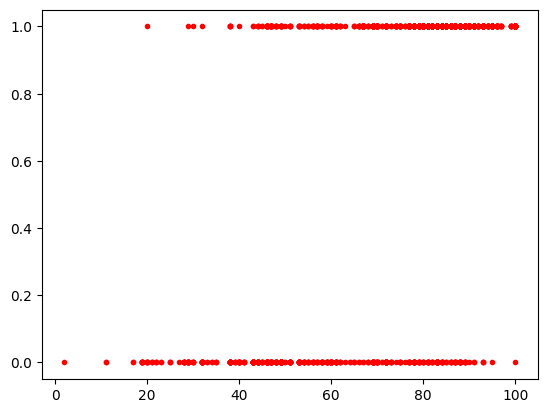

In [121]:
plt.scatter(df5.cloud, df5.rainfall, marker='.',color='red')

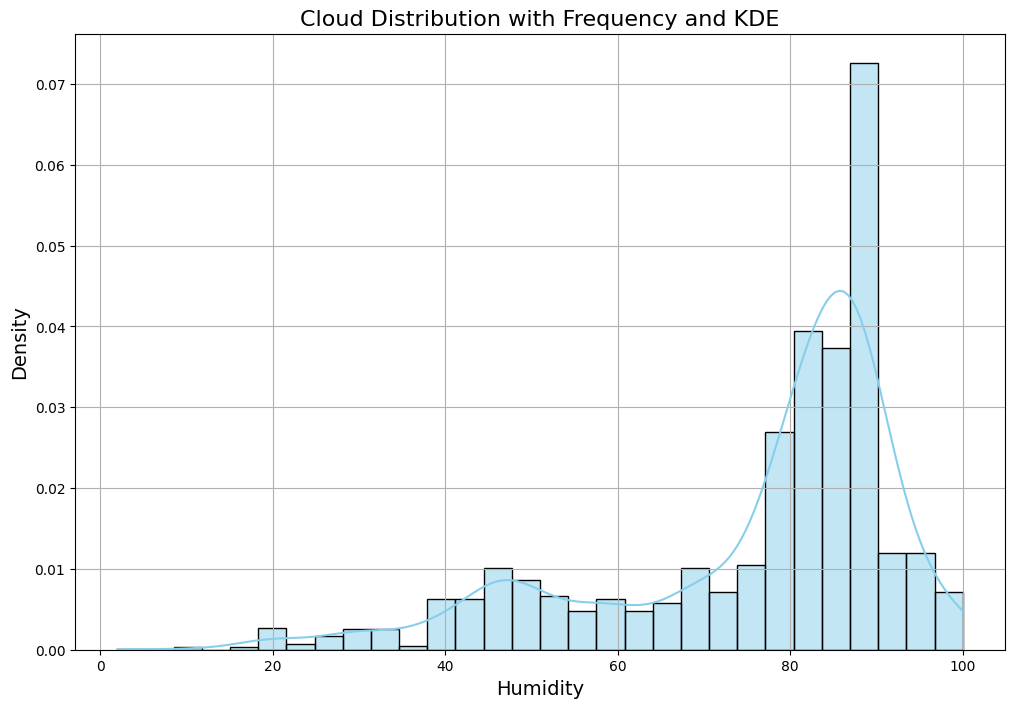

In [122]:
plt.figure(figsize=(12, 8))

sn.histplot(df5['cloud'], kde=True, color='skyblue', bins=30, stat='density')

plt.title('Cloud Distribution with Frequency and KDE', fontsize=16)
plt.xlabel('Humidity', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True)

plt.show()

In [125]:
df6 = df5[df5['cloud']>20]

In [126]:
df6

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2185,361,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1,1
2186,2186,362,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3,1
2187,2187,363,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9,1
2188,2188,364,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,18.0,1


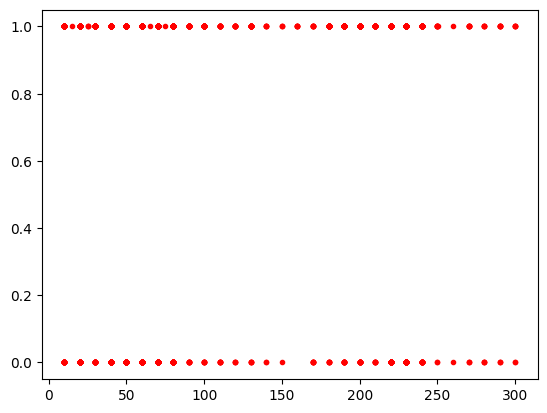

In [128]:
plt.scatter(df6.winddirection, df6.rainfall, marker='.',color='red')

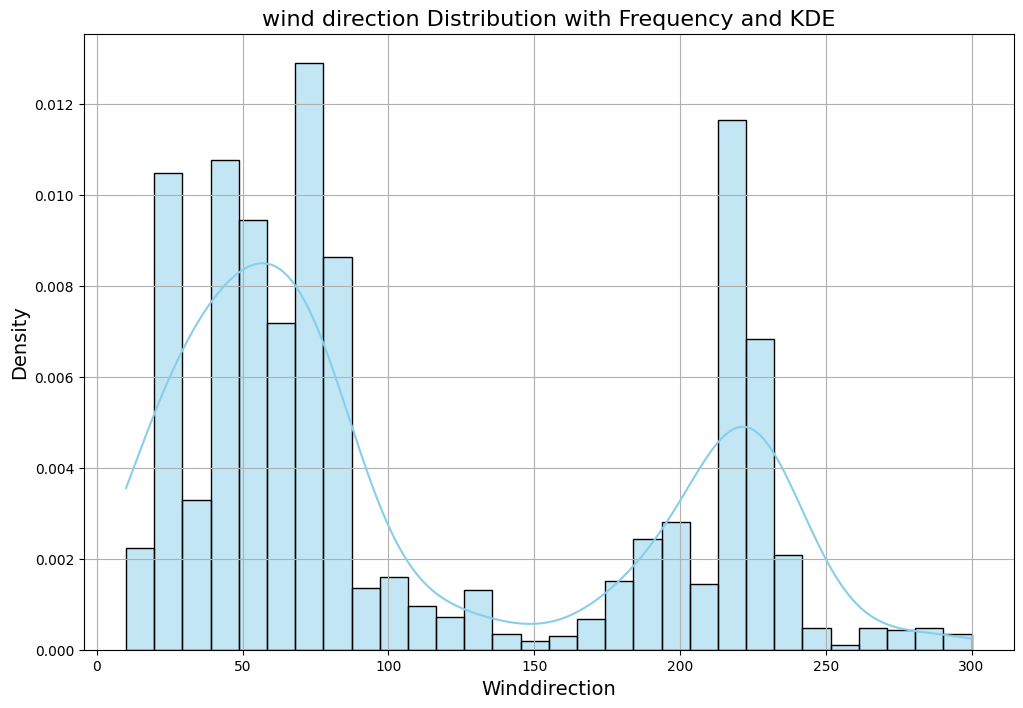

In [134]:
plt.figure(figsize=(12, 8))

sn.histplot(df6['winddirection'], kde=True, color='skyblue', bins=30, stat='density')

plt.title('wind direction Distribution with Frequency and KDE', fontsize=16)
plt.xlabel('Winddirection', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True)

plt.show()

In [135]:
df7 = df6[df6['winddirection']<270]

In [136]:
rainfall_count = df7['rainfall'].value_counts()
rainfall_count

rainfall
1    1611
0     487
Name: count, dtype: int64

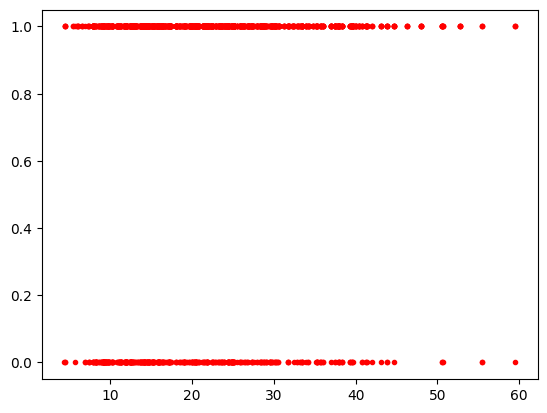

In [138]:
plt.scatter(df7.windspeed, df7.rainfall, marker='.',color='red')

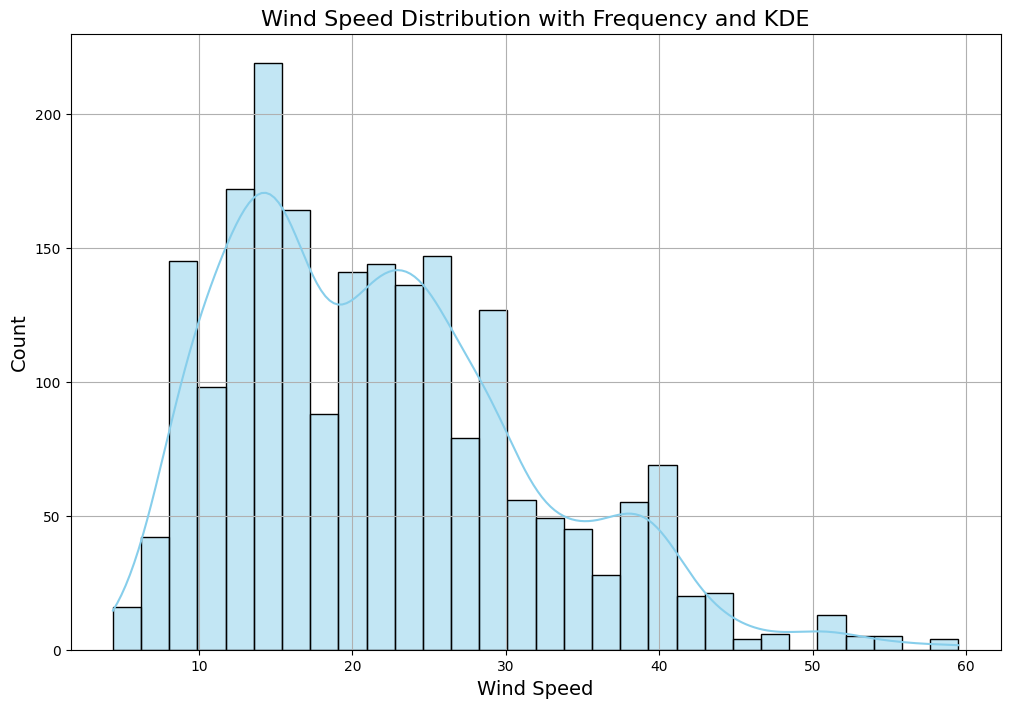

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

sns.histplot(df7['windspeed'], kde=True, color='skyblue', bins=30, stat='count')

plt.title('Wind Speed Distribution with Frequency and KDE', fontsize=16)
plt.xlabel('Wind Speed', fontsize=14)
plt.ylabel('Count', fontsize=14)  
plt.grid(True)

# Show the plot
plt.show()


In [152]:
df8 = df7[df7['windspeed']<50]
df8

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2185,361,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1,1
2186,2186,362,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3,1
2187,2187,363,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9,1
2188,2188,364,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,18.0,1


In [153]:
df8[df8['windspeed']>40]

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
20,20,21,1022.4,17.7,16.4,14.8,11.3,92.0,88.0,0.4,30.0,41.3,1
153,153,154,1009.4,32.0,29.0,27.0,24.5,76.0,44.0,10.7,220.0,40.8,0
255,255,256,1010.2,29.2,27.0,25.7,25.4,79.0,67.0,4.5,80.0,44.7,1
309,309,310,1017.5,25.3,21.6,19.7,19.6,82.0,84.0,0.1,70.0,43.8,0
364,364,365,1013.0,21.0,19.3,17.9,17.3,94.0,88.0,0.1,60.0,42.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,2118,294,1012.4,27.7,25.8,24.4,22.1,82.0,87.0,1.1,70.0,40.8,1
2123,2123,299,1017.4,26.5,24.8,23.8,22.5,87.0,77.0,4.6,90.0,44.7,1
2158,2158,334,1024.4,17.6,16.1,15.2,8.9,64.0,81.0,0.0,60.0,48.0,1
2164,2164,340,1017.7,17.3,16.6,15.4,13.5,84.0,93.0,0.0,70.0,43.8,1


In [154]:
df8.shape

(2071, 13)

In [157]:
condition = (df8['rainfall'] == 0) & (df8['cloud'] > 70) & (df8['humidity'] > 70) & (df8['dewpoint']>16)

df9 = df8[~condition]
df9

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2185,361,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1,1
2186,2186,362,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3,1
2187,2187,363,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9,1
2188,2188,364,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,18.0,1


In [158]:
df9[df9['windspeed']>40]

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
20,20,21,1022.4,17.7,16.4,14.8,11.3,92.0,88.0,0.4,30.0,41.3,1
153,153,154,1009.4,32.0,29.0,27.0,24.5,76.0,44.0,10.7,220.0,40.8,0
255,255,256,1010.2,29.2,27.0,25.7,25.4,79.0,67.0,4.5,80.0,44.7,1
364,364,365,1013.0,21.0,19.3,17.9,17.3,94.0,88.0,0.1,60.0,42.0,1
394,394,30,1014.9,21.3,20.5,20.1,19.3,90.0,93.0,0.0,70.0,40.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,2118,294,1012.4,27.7,25.8,24.4,22.1,82.0,87.0,1.1,70.0,40.8,1
2123,2123,299,1017.4,26.5,24.8,23.8,22.5,87.0,77.0,4.6,90.0,44.7,1
2158,2158,334,1024.4,17.6,16.1,15.2,8.9,64.0,81.0,0.0,60.0,48.0,1
2164,2164,340,1017.7,17.3,16.6,15.4,13.5,84.0,93.0,0.0,70.0,43.8,1


In [159]:
rainfall_count = df9['rainfall'].value_counts()
rainfall_count

rainfall
1    1590
0     386
Name: count, dtype: int64

In [231]:
x = df9.drop(['rainfall','id','day'],axis='columns')
y = df9['rainfall']

In [232]:
x

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2
1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9
2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1
3,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6
4,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8
...,...,...,...,...,...,...,...,...,...,...
2185,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1
2186,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3
2187,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9
2188,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,18.0


In [233]:
y

0       1
1       1
2       1
3       1
4       0
       ..
2185    1
2186    1
2187    1
2188    1
2189    1
Name: rainfall, Length: 1976, dtype: int64

In [234]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

def find_best_model_and_estimators(X_train, y_train):
    # Define models and hyperparameters
    model_params = {
        'logistic_regression': {
            'model': LogisticRegression(),
            'params': {
                'logisticregression__penalty': ['l2'],  # Corrected: model step name followed by __ and param name
                'logisticregression__C': [0.01, 0.1, 1, 10],
                'logisticregression__solver': ['lbfgs', 'liblinear']
            }
        },
        'svm': {
            'model': SVC(),
            'params': {
                'svc__C': [0.1, 1, 10],  # Corrected for SVC
                'svc__kernel': ['linear', 'rbf', 'poly'],
                'svc__gamma': ['scale', 'auto']
            }
        },
        'random_forest': {
            'model': RandomForestClassifier(),
            'params': {
                'randomforestclassifier__n_estimators': [50, 100, 200],
                'randomforestclassifier__max_depth': [None, 10, 20, 30],
                'randomforestclassifier__min_samples_split': [2, 5, 10],
                'randomforestclassifier__criterion': ['gini', 'entropy']
            }
        }
    }

    # Initialize lists to store results
    scores = []
    best_estimators = {}

    # Cross-validation setup
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    # Loop through each model and perform GridSearchCV with StandardScaler in the pipeline
    for algo, mp in model_params.items():
        # Create a pipeline with StandardScaler and the model
        pipe = make_pipeline(StandardScaler(), mp['model'])
        
        # Initialize GridSearchCV
        clf = GridSearchCV(pipe, mp['params'], cv=cv, return_train_score=False)
        
        # Fit the model
        clf.fit(X_train, y_train)
        
        # Append results
        scores.append({
            'model': algo,
            'best_score': clf.best_score_,
            'best_params': clf.best_params_
        })
        
        # Store the best estimator
        best_estimators[algo] = clf.best_estimator_

    # Return scores and best_estimators
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params']), best_estimators

In [235]:

scores, best_estimators = find_best_model_and_estimators(x, y)

print(scores)

print(best_estimators)

                 model  best_score  \
0  logistic_regression    0.907071   
1                  svm    0.902020   
2        random_forest    0.902525   

                                         best_params  
0  {'logisticregression__C': 0.01, 'logisticregre...  
1  {'svc__C': 1, 'svc__gamma': 'scale', 'svc__ker...  
2  {'randomforestclassifier__criterion': 'entropy...  
{'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.01, solver='liblinear'))]), 'svm': Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(C=1))]), 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', max_depth=10,
                                        min_samples_split=10,
                                        n_estimators=200))])}


In [255]:
best_svm_model = best_estimators['svm']
best_logistic_model = best_estimators['logistic_regression']

In [269]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.6)

In [270]:
best_svm_model.fit(x_train, y_train)
best_logistic_model.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.01, solver='liblinear'))])

In [271]:
best_svm_model.score(x_test, y_test)

0.900126422250316

In [272]:
best_logistic_model.score(x_test, y_test)

0.9026548672566371

In [273]:
tdf = pd.read_csv('test.csv')
tdf.isnull().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        0
dtype: int64

In [274]:
mean_winddir = math.floor(df9['winddirection'].mean())
tdf['winddirection'] = tdf['winddirection'].fillna(mean_winddir)
print(tdf.isnull().sum())

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
dtype: int64


In [275]:
tdf[tdf['id']==2707]

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
517,2707,153,1007.8,32.9,30.6,28.9,22.0,65.0,75.0,8.2,102.0,17.2


In [276]:
xt = tdf[['pressure','maxtemp','temparature','mintemp','dewpoint','humidity','cloud','sunshine','winddirection','windspeed']]
xt

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4
...,...,...,...,...,...,...,...,...,...,...
725,1020.8,18.2,17.6,16.1,13.7,96.0,95.0,0.0,20.0,34.3
726,1011.7,23.2,18.1,16.0,16.0,78.0,80.0,1.6,40.0,25.2
727,1022.7,21.0,18.5,17.0,15.5,92.0,96.0,0.0,50.0,21.9
728,1014.4,21.0,20.0,19.7,19.8,94.0,93.0,0.0,50.0,39.5


In [277]:
yt = best_svm_model.predict(xt)

In [279]:
result = pd.DataFrame({
    'id': tdf['id'],
    'prediction': yt
})

result.to_csv('prediction_v1.csv', index=False, mode='w')  

print(pd.read_csv('prediction_v1.csv'))

       id  prediction
0    2190           1
1    2191           1
2    2192           1
3    2193           0
4    2194           0
..    ...         ...
725  2915           1
726  2916           1
727  2917           1
728  2918           1
729  2919           1

[730 rows x 2 columns]


In [280]:
yt = best_logistic_model.predict(xt)

In [281]:
result = pd.DataFrame({
    'id': tdf['id'],
    'prediction': yt
})

result.to_csv('prediction_v2.csv', index=False, mode='w')  

print(pd.read_csv('prediction_v2.csv'))

       id  prediction
0    2190           1
1    2191           1
2    2192           1
3    2193           0
4    2194           0
..    ...         ...
725  2915           1
726  2916           1
727  2917           1
728  2918           1
729  2919           1

[730 rows x 2 columns]
